#### Import Dependencies and Read dataset

Data overview →

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("housing_price_dataset.csv")

##### Diagnose your dataset

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


##### Check Top 5 rows

In [65]:
dataset.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


##### Check dataset statistics
    * Generate descriptive statistics:
    Descriptive statistics include those that summarize the central tendency, 
    dispersion and shape of a dataset’s distribution, excluding NaN values.

    * Mean: The sum of all values in a dataset divided by the number of values. 
            It represents the "average" value.
            
    * Standard Deviation (std): 
    A measure of the spread or variability of the data around the  
    mean. A higher standard deviation indicates a wider spread of 
    data points, while a lower standard deviation indicates that  
    the data points are clustered closer to the mean. 

In [14]:
dataset.describe(include="all")   

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000
unique,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,Suburb,NaN,NaN
freq,NaN,NaN,NaN,16721,NaN,NaN
mean,2006.374680,3.498700,1.995420,NaN,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,NaN,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,NaN,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,NaN,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,NaN,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,NaN,2003.000000,279373.630052


#### Univariate analysis
* Analyze just a single feature or columns.
* Central Tendency (Mean, Median and Mode).
* Data Skewness and Kurtosis.

* Plots
    * Data Distribution (historgram)
    * Box plot (outliers)


Text(0, 0.5, 'count')

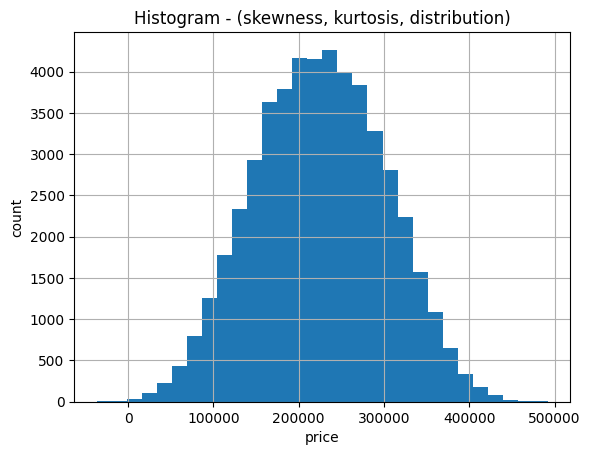

In [15]:
plt.title("Histogram - (skewness, kurtosis, distribution)")
dataset['Price'].hist(bins=30)
plt.xlabel("price")
plt.ylabel("count")

<Axes: title={'center': 'Boxplots - Outlier detection'}, ylabel='SquareFeet'>

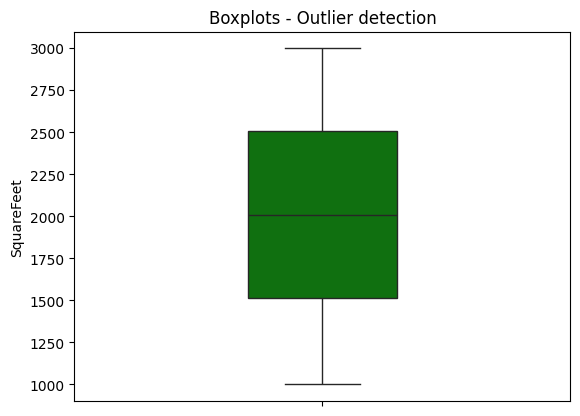

In [91]:
plt.title("Boxplots - Outlier detection")
sns.boxplot(dataset["SquareFeet"],color='green',width=0.3)

#### Bivariate Analysis
* Helps us to understand relationship between two variables or features.

* Correlation 
    * Below an example, how study hours impact test scores.
        * If points follow a clear upward line → positive correlation.
        * If points follow a downward line → negative correlation.
        * If scattered randomly → no correlation. 

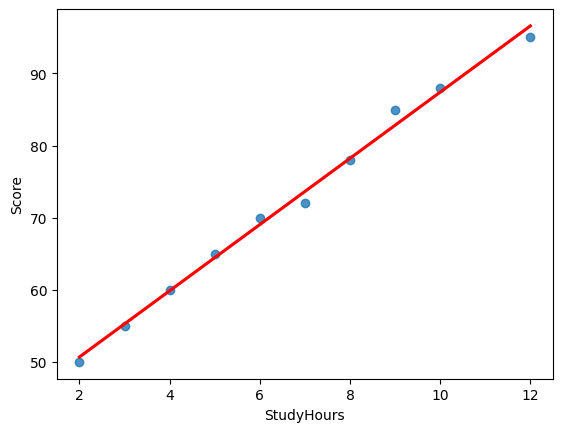

In [64]:
df = pd.DataFrame({"StudyHours":[2,3,4,5,6,7,8,9,10,12],
                   "Score":[50,55,60,65,70,72,78,85,88,95]})

#sns.scatterplot(x="StudyHours", y="Score", data=df) #or
sns.regplot(x="StudyHours", y="Score", data=df, ci=None, line_kws={"color":"red"})
plt.show()

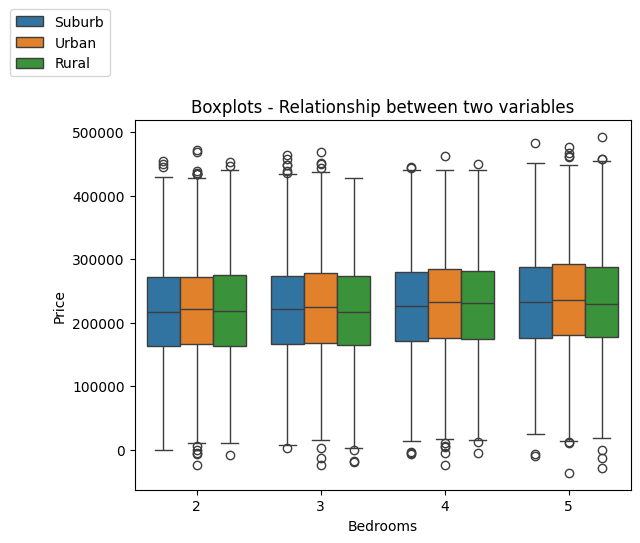

In [116]:
plt.title("Boxplots - Relationship between two variables")
sns.boxplot(x='Bedrooms', y='Price',hue="Neighborhood", data=dataset)
plt.legend(bbox_to_anchor=(-0.05, 1.3), loc='upper right', borderaxespad=0.)

#### Case Study:
* Does Square feet and Neighborhood have any pattern?

<Axes: title={'center': 'Neigborhood and Squarefeet Relationship'}, xlabel='Neighborhood', ylabel='SquareFeet'>

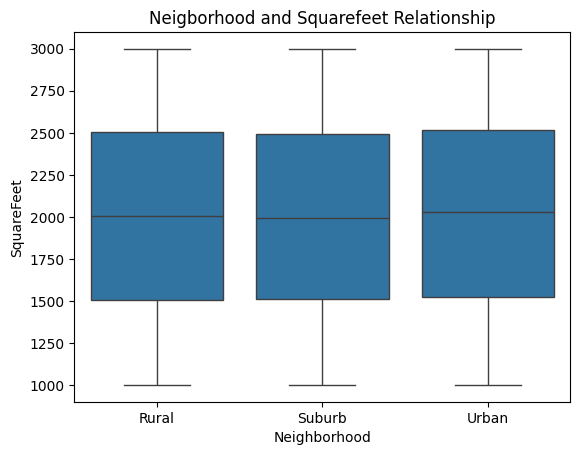

In [127]:
plt.title("Neigborhood and Squarefeet Relationship")
sns.boxplot(x="Neighborhood",y="SquareFeet",data=dataset)

#### Case study:
* Need clarity on how the prices have fluctuated over years, but since price are continous numbers
  the plots are confusing. This can be simply plotted with:
  ```sns.scatterplot(x="YearBuilt",y="Price",data=dataset)```
* But to create clarity, we can make the years into a new feature called ```Decade```.
* Now play with it.

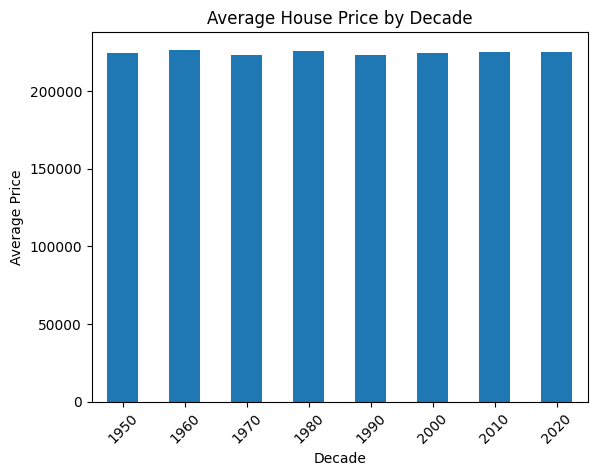

In [73]:
dataset['Decade'] = (dataset['YearBuilt'] // 10) * 10
decade_price = dataset.groupby("Decade").Price.mean()
decade_price.plot(kind="bar", rot=45, ylabel="Average Price", xlabel="Decade", title="Average House Price by Decade")
plt.show()

#### Case study:
* Add neighborhood feature to it to see its effect.

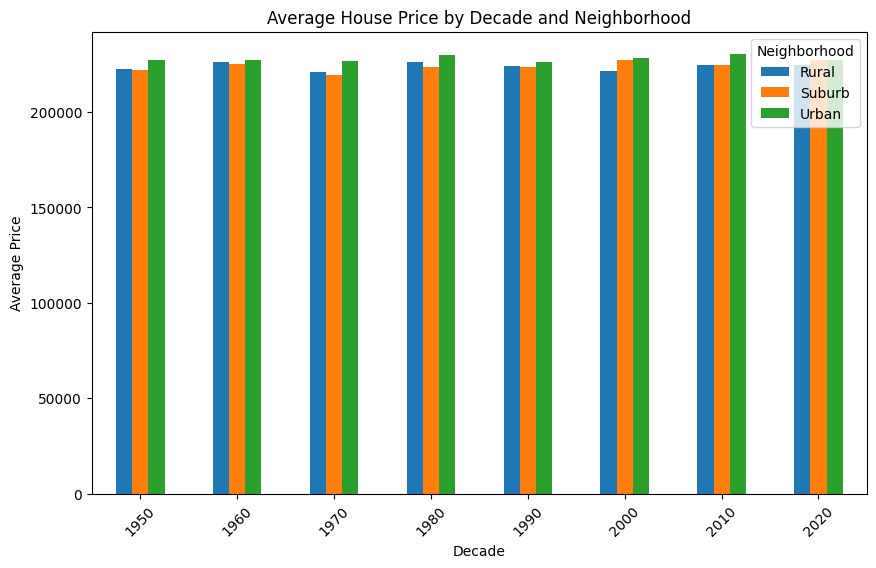

In [188]:
decade_neigh_price = dataset.groupby(["Decade", "Neighborhood"])["Price"].median().unstack()
decade_neigh_price.plot(kind="bar", rot=45,figsize=(10,6))
plt.title("Average House Price by Decade and Neighborhood")
plt.ylabel("Average Price")
plt.show()

#### Assignment:

* Find the mean of scores, grouped by ```level```
    * Context Indicator:
      * x3 is easy.
      * x2 is medium.
      * x1 is hard.
* Plot a bar chart

In [16]:
demodata = {"name":["a","b","c","d","e","f"],
            "scores":[35,30,78,37,43,23],
            "level":["x1","x1","x3","x2","x2","x1"]}
demodata = pd.DataFrame(demodata)

##### IQR 
 - We first measure the spread of the middle 50% of data → that’s the IQR (Interquartile Range) = Q3 − Q1.
 - Then we extend this range a bit on both sides to decide what counts as “normal.”

##### Rule:
    * Lower bound = Q1 − 1.5 × IQR
    * Upper bound = Q3 + 1.5 × IQR
    
    Anything outside is flagged as an outlier.

##### Diagnosing outliers:

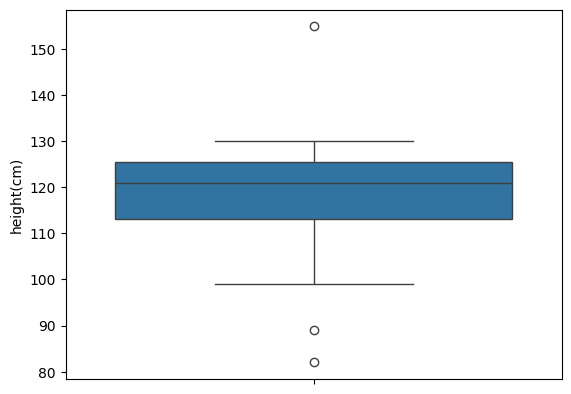

In [4]:
df = pd.DataFrame({"height(cm)":[120,130,122,89,82,127,118,119,125,123,155,99]})  
sns.boxplot(y=df["height(cm)"]); plt.show()

Q1,Q3 = df["height(cm)"].quantile([0.25,0.75])
IQR = Q3-Q1
#outliers = df[(df["height(cm)"] < Q1-1.5*IQR) | (df["height(cm)"] > Q3+1.5*IQR)]

In [29]:
outliers_filter = (df["height(cm)"] < Q1-1.5*IQR) | (df["height(cm)"] > Q3+1.5*IQR)
clean_data = df[~outliers_filter] #without outliers

##### Assignment:
- In the above given data try to find whether ```bedroom``` and ```bathroom``` and inherent pattern.
- Use any kind of plots you believe can get you a visual clarity.

Hint : Use ```Mode``` here for better interpretation than ```mean``` or ```median```
